# 1. Importing all necessary libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

import statsmodels.formula.api as smf

import numpy as np

# 2. Data Collection

In [2]:
cars_data=pd.read_csv(r"D:\Data Science\Data sets\Cars.csv")
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


# 3. Data Understanding

## 3.1 Initial Analysis

In [4]:
cars_data.shape

(81, 5)

In [5]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [6]:
cars_data.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


## 3.2 Assumption Check

### 3.2.1 Linearity Test

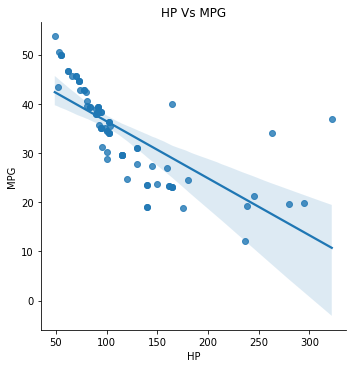

In [9]:
sns.lmplot( x='HP', y='MPG', data=cars_data)
plt.title('HP Vs MPG')
plt.show()

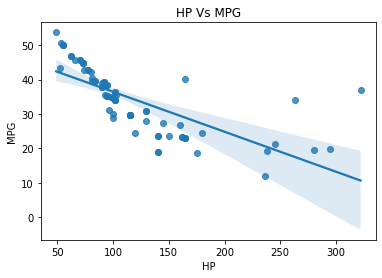

In [10]:
sns.regplot(x='HP', y='MPG', data=cars_data)
plt.title('HP Vs MPG')
plt.show()

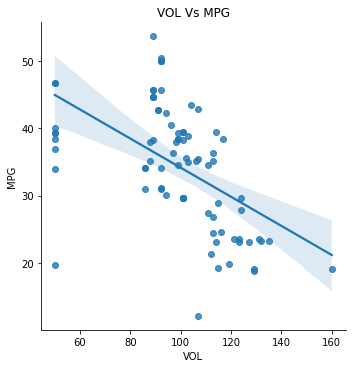

In [11]:
sns.lmplot( x='VOL', y='MPG', data=cars_data)
plt.title('VOL Vs MPG')
plt.show()

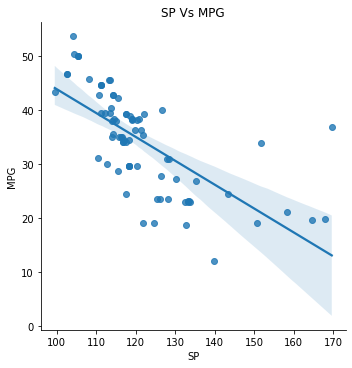

In [12]:
sns.lmplot( x='SP', y='MPG', data=cars_data)
plt.title('SP Vs MPG')
plt.show()

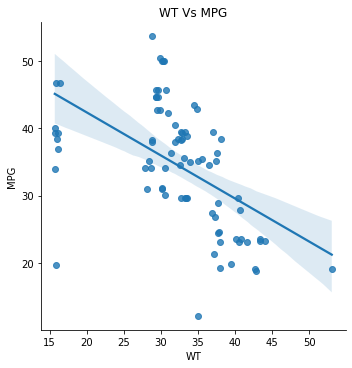

In [13]:
sns.lmplot( x='WT', y='MPG', data=cars_data)
plt.title('WT Vs MPG')
plt.show()

### 3.2.2 Normality Test

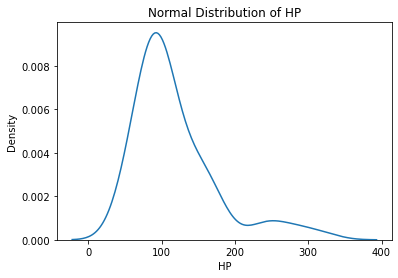

In [16]:
sns.kdeplot(x=cars_data['HP'])
plt.title('Normal Distribution of HP')
plt.show()

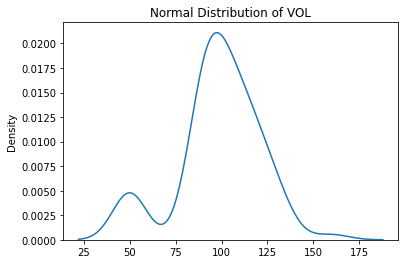

In [18]:
sns.distplot(x=cars_data['VOL'], hist=False)
plt.title('Normal Distribution of VOL')
plt.show()

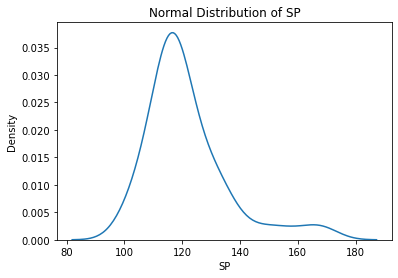

In [19]:
sns.kdeplot(x=cars_data['SP'])
plt.title('Normal Distribution of SP')
plt.show()

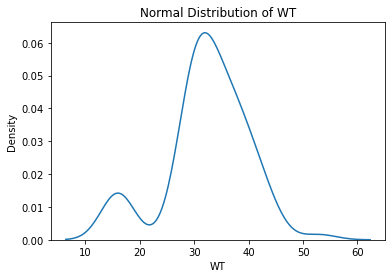

In [20]:
sns.kdeplot(x=cars_data['WT'])
plt.title('Normal Distribution of WT')
plt.show()

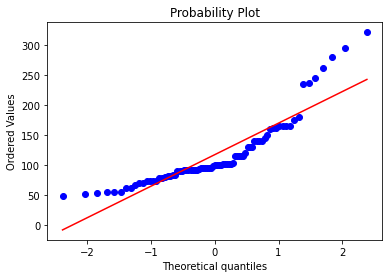

In [24]:
from scipy import stats
stats.probplot(x = cars_data['HP'] ,dist = 'norm',plot=plt) #qqplot
plt.show()

### 3.2.3 Auto Regression Test
**It is passed as no datetime features are present**

### 3.2.4 Multi Collinearity Test
**Done after building model to check relationship between inputs using 2 techniques:**
1. **Correlation Matrix**
2. **VIF Factor**

## Both Linearity and Normality tests are Failed

# 4. Model Building

In [26]:
inputs=cars_data[['HP','VOL','SP','WT']]
inputs

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [27]:
actual_output=cars_data[['MPG']]
actual_output

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


# 5. Model Training
### Using sklearn --- from sklearn.linear_model import LinearRegression

In [30]:
linear_model=LinearRegression()  # Model Initialization or Obj creation
linear_model

LinearRegression()

In [32]:
linear_model.fit(inputs,actual_output)

LinearRegression()

In [33]:
linear_model.coef_

array([[-0.20544372, -0.33605084,  0.39562692,  0.40057409]])

In [34]:
linear_model.intercept_

array([30.67733585])

### Using statsmodels --- import statsmodels.formula.api as smf

In [58]:
linear_model_stats = smf.ols('MPG~HP + VOL + SP + WT',data = cars_data).fit()

In [60]:
linear_model_stats.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

# 6. Model Testing

In [40]:
output_pred=linear_model.predict(inputs)
output_pred

array([[43.44193477],
       [42.38879289],
       [42.27934147],
       [42.53835981],
       [42.17264802],
       [43.02061916],
       [42.32536062],
       [48.07621852],
       [48.28120247],
       [40.79122814],
       [41.52153227],
       [47.80956747],
       [39.95980269],
       [41.52757889],
       [41.76632332],
       [41.6181448 ],
       [41.15094046],
       [47.98605515],
       [41.30861046],
       [37.87127922],
       [38.57706414],
       [37.35199705],
       [37.89770285],
       [39.5625144 ],
       [39.93380662],
       [46.73870908],
       [35.48165898],
       [38.78152504],
       [38.24861192],
       [36.00285298],
       [34.84603989],
       [37.21630246],
       [37.13919796],
       [34.82541399],
       [37.22361389],
       [37.53950097],
       [39.27144845],
       [38.24219888],
       [38.54286458],
       [35.9391722 ],
       [34.2129755 ],
       [35.36313259],
       [37.50473376],
       [38.07998482],
       [35.79651664],
       [36

In [36]:
actual_output

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


# 7. Model Evaluation

In [39]:
linear_model.astype('float')

AttributeError: 'LinearRegression' object has no attribute 'astype'

In [41]:
error=actual_output-output_pred
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


## Back to Assumption Check

### 3.2.5 Homoscedasticity Check

In [44]:
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


### To chech Homoscedasticity, we first bring all input features to std values
**from sklearn.preprocessing import StandardScaler**

In [45]:
from sklearn.preprocessing import StandardScaler

In [49]:
std_scaled=StandardScaler()
std_scaled_inputs=std_scaled.fit_transform(inputs)
std_scaled_inputs=pd.DataFrame(data=std_scaled_inputs,columns=['HP','VOL','SP','WT'])
std_scaled_inputs

,HP,VOL,SP,WT
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


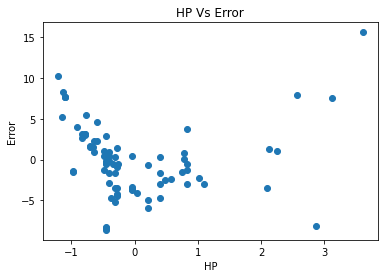

In [51]:
plt.scatter(x=std_scaled_inputs['HP'],y=error)
plt.xlabel('HP')
plt.ylabel('Error')
plt.title('HP Vs Error')
plt.show()

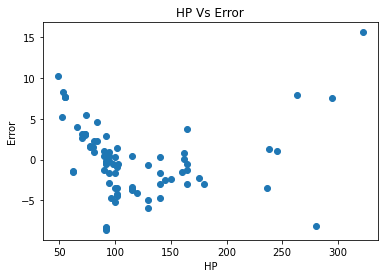

In [52]:
plt.scatter(x=inputs['HP'],y=error)  # HP values not standardised
plt.xlabel('HP')
plt.ylabel('Error')
plt.title('HP Vs Error')
plt.show()

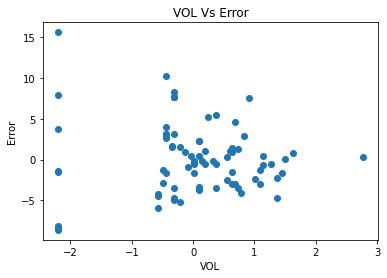

In [53]:
plt.scatter(x=std_scaled_inputs['VOL'],y=error)
plt.xlabel('VOL')
plt.ylabel('Error')
plt.title('VOL Vs Error')
plt.show()

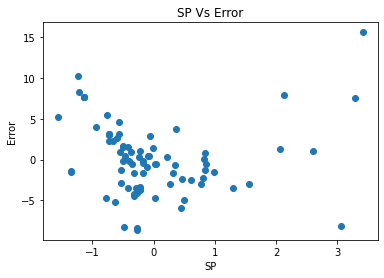

In [54]:
plt.scatter(x=std_scaled_inputs['SP'],y=error)
plt.xlabel('SP')
plt.ylabel('Error')
plt.title('SP Vs Error')
plt.show()

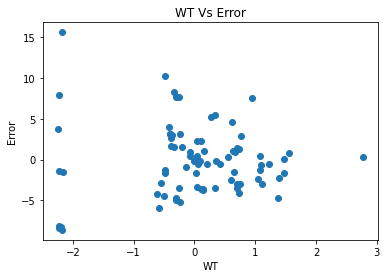

In [55]:
plt.scatter(x=std_scaled_inputs['WT'],y=error)
plt.xlabel('WT')
plt.ylabel('Error')
plt.title('WT Vs Error')
plt.show()

### Homoscedasticity Test is Failed

### 3.2.6 Zero Residual Mean 

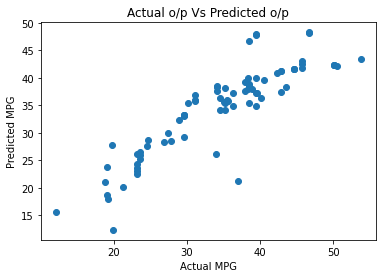

In [56]:
plt.scatter(x=actual_output,y=output_pred)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual o/p Vs Predicted o/p')
plt.show()

### Zero Residual Test is also Failed

# Evaluation Metrics of Linear Regression
1. rsquared
2. rsquared_adj
3. aic value
4. bic value

### rsquared, adj rsquared,aic and bic will not come as sklearn library does not have that function. So we require statsmodels library

In [63]:
linear_model_stats.rsquared.round(4)

0.7705

In [64]:
linear_model_stats.rsquared_adj.round(4)

0.7585

In [65]:
linear_model_stats.aic.round(4)

477.9279

In [66]:
linear_model_stats.bic.round(4)

489.9002

## Let's check evaluation metrics for different input as per its contribution

In [78]:
linear_model_stats_1=smf.ols(formula='MPG~HP',data=cars_data).fit()
print('R-squared      :',linear_model_stats_1.rsquared.round(4))
print('Adj R-squared  :',linear_model_stats_1.rsquared_adj.round(4))
print('AIC Value      :',linear_model_stats_1.aic.round(4))
print('BIC Value      :',linear_model_stats_1.bic.round(4))
print('P-Value :\n')
print(linear_model_stats_1.pvalues)

R-squared      : 0.5257
Adj R-squared  : 0.5197
AIC Value      : 530.7453
BIC Value      : 535.5342
P-Value :

Intercept    1.211037e-44
HP           1.956490e-14
dtype: float64


In [79]:
linear_model_stats_2=smf.ols(formula='MPG~HP + VOL',data=cars_data).fit()
print('R-squared      :',linear_model_stats_2.rsquared.round(4))
print('Adj R-squared  :',linear_model_stats_2.rsquared_adj.round(4))
print('AIC Value      :',linear_model_stats_2.aic.round(4))
print('BIC Value      :',linear_model_stats_2.bic.round(4))
print('P-Value :\n')
print(linear_model_stats_2.pvalues)

R-squared      : 0.7507
Adj R-squared  : 0.7443
AIC Value      : 480.6569
BIC Value      : 487.8403
P-Value :

Intercept    7.697003e-41
HP           1.203680e-19
VOL          1.654693e-12
dtype: float64


In [80]:
linear_model_stats_3=smf.ols(formula='MPG~HP + VOL + SP',data=cars_data).fit()
print('R-squared      :',linear_model_stats_3.rsquared.round(4))
print('Adj R-squared  :',linear_model_stats_3.rsquared_adj.round(4))
print('AIC Value      :',linear_model_stats_3.aic.round(4))
print('BIC Value      :',linear_model_stats_3.bic.round(4))
print('P-Value :\n')
print(linear_model_stats_3.pvalues)

R-squared      : 0.7704
Adj R-squared  : 0.7614
AIC Value      : 475.9875
BIC Value      : 485.5653
P-Value :

Intercept    4.194554e-02
HP           8.644870e-07
VOL          1.648229e-13
SP           1.207855e-02
dtype: float64


In [81]:
linear_model_stats_4=smf.ols(formula='MPG~HP + VOL + SP + WT',data=cars_data).fit()
print('R-squared      :',linear_model_stats_4.rsquared.round(4))
print('Adj R-squared  :',linear_model_stats_4.rsquared_adj.round(4))
print('AIC Value      :',linear_model_stats_4.aic.round(4))
print('BIC Value      :',linear_model_stats_4.bic.round(4))
print('P-Value :\n')
print(linear_model_stats_4.pvalues)

R-squared      : 0.7705
Adj R-squared  : 0.7585
AIC Value      : 477.9279
BIC Value      : 489.9002
P-Value :

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64


#### From sklearn, we can get mean_squared_error and mean_absolute_error

In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [84]:
mean_squared_error(actual_output,output_pred)

18.897141152343103

In [85]:
mean_absolute_error(actual_output,output_pred)

3.267968285420799

In [2]:
import pandas as pd

In [3]:
a=[10,12,14,16,18]

In [4]:
adf=pd.DataFrame({'a':pd.Series(a)})

In [5]:
adf.var()

a    10.0
dtype: float64